<a href="https://colab.research.google.com/github/abhaanisha/blog/blob/main/optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing different Optimizers on MNIST dataset

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [23]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [25]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [27]:
# Define optimizers
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
adadelta = tf.keras.optimizers.Adadelta(learning_rate=1.0)
adamax = tf.keras.optimizers.Adamax(learning_rate=0.01)
nadam = tf.keras.optimizers.Nadam(learning_rate=0.01)

In [28]:
optimizers = [('SGD', sgd),
              ('SGD with Momentum', momentum),
              ('RMSProp', rmsprop),
              ('Adam', adam),
              ('Adagrad', adagrad),
              ('Adadelta', adadelta),
              ('Adamax', adamax),
              ('Nadam', nadam)]

In [29]:
history_dict = {}

for opt_name, opt in optimizers:
    model = create_model()
    model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])

    # Print optimizer name
    print(f'\nTraining with {opt_name} optimizer')

    history = model.fit(x_train, y_train,
                        batch_size=128,
                        epochs=5,
                        verbose=1,
                        validation_data=(x_test, y_test))

    # Store the history for this optimizer
    history_dict[opt_name] = history


Training with SGD optimizer
Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 1.0003 - accuracy: 0.6836 - val_loss: 0.3161 - val_accuracy: 0.9078
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4452 - accuracy: 0.8619 - val_loss: 0.2350 - val_accuracy: 0.9307
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3718 - accuracy: 0.8860 - val_loss: 0.2051 - val_accuracy: 0.9381
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3265 - accuracy: 0.8987 - val_loss: 0.1824 - val_accuracy: 0.9448
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3040 - accuracy: 0.9077 - val_loss: 0.1637 - val_accuracy: 0.9502

Training with SGD with Momentum optimizer
Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.5051 - accuracy: 0.8407 - val_loss: 0.1609 - val_accuracy: 0.9516
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2041 

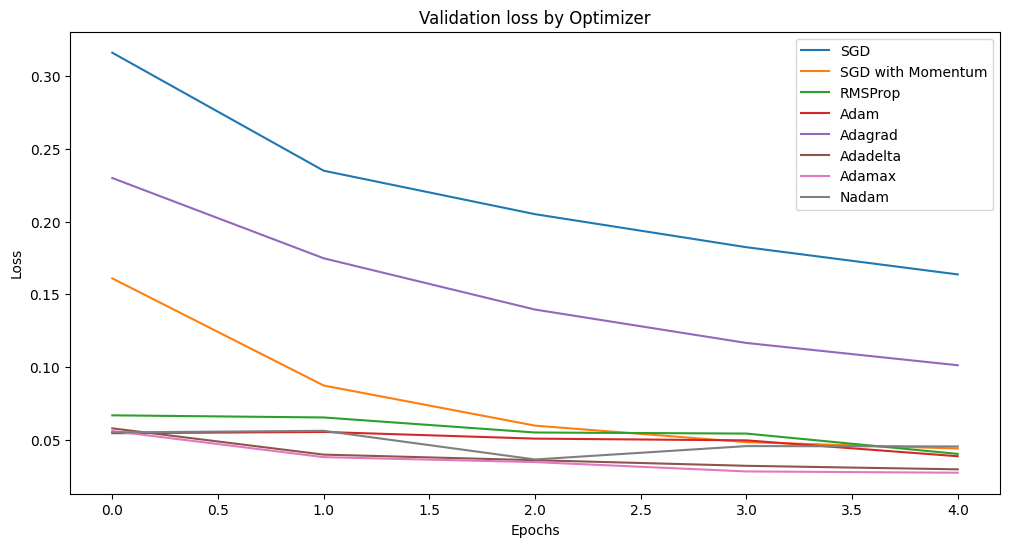

In [30]:
# Now plot the loss and accuracy for different optimizers
plt.figure(figsize=(12, 6))

for opt_name, history in history_dict.items():
    val_loss = history.history['val_loss']
    plt.plot(val_loss, label=opt_name)

plt.title('Validation loss by Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

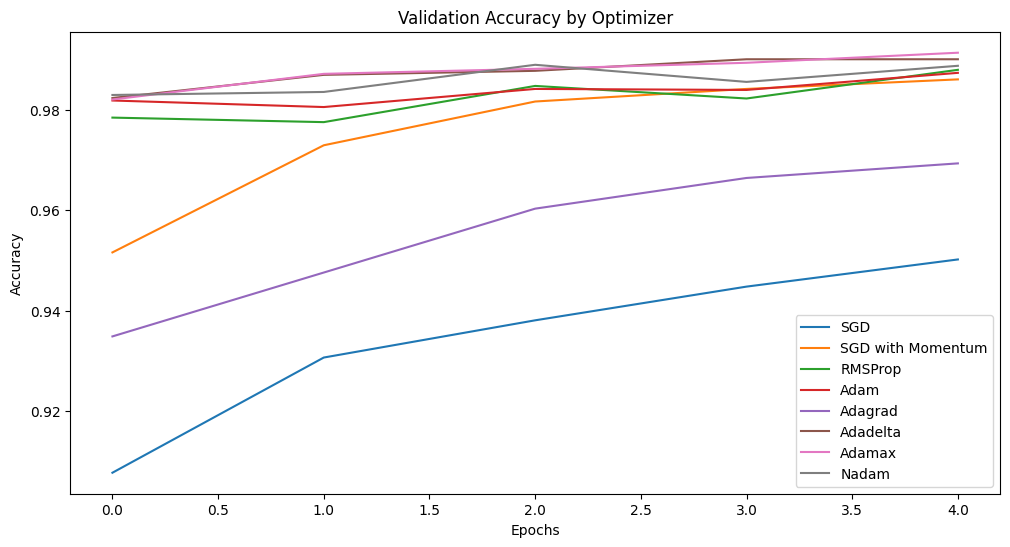

In [31]:
plt.figure(figsize=(12, 6))

for opt_name, history in history_dict.items():
    val_accuracy = history.history['val_accuracy']
    plt.plot(val_accuracy, label=opt_name)

plt.title('Validation Accuracy by Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()